In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import csv

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
! ls

EDA.ipynb                    gaa_geo0.csv
age_gender0.csv              gaa_geo1.csv
age_gender1.csv              gaa_keyword0.csv
direct.csv                   gaa_keyword1.csv
gaa_browser0.csv             gaa_mobile1.csv
gaa_browser1.csv             gaaaa0.csv
gaa_browser_and_version0.csv gaaaa1.csv
gaa_browser_and_version1.csv


In [338]:
gaa_browser0 = pd.read_csv('gaa_browser0.csv')
gaa_browser1 = pd.read_csv('gaa_browser1.csv')
gaa_browser_and_version0 = pd.read_csv('gaa_browser_and_version0.csv', error_bad_lines = False)
gaa_browser_and_version1 = pd.read_csv('gaa_browser_and_version1.csv', error_bad_lines = False)
gaa_geo0 = pd.read_csv('gaa_geo0.csv')
gaa_geo1 = pd.read_csv('gaa_geo1.csv')
gaa_keyword0 = pd.read_csv('gaa_keyword0.csv')
gaa_keyword1 = pd.read_csv('gaa_keyword1.csv')
gaa_mobile1 = pd.read_csv('gaa_mobile1.csv')
gaaaa0 = pd.read_csv('gaaaa0.csv')
gaaaa1 = pd.read_csv('gaaaa1.csv')

b'Skipping line 13791: expected 14 fields, saw 15\n'
b'Skipping line 13662: expected 7 fields, saw 8\n'


In [98]:
age_gender0 = pd.read_csv("age_gender0.csv")
age_gender1 = pd.read_csv("age_gender1.csv")
age_gender0.head()

,ga:date,ga:adcontent,ga:userAgeBracket,ga:userGender,ga:sessions,ga:avgSessionDuration,ga:bounceRate,ga:hits,ga:transactions,ga:transactionRevenue,ga:users,ga:newUsers,ga:percentNewSessions,ga:productAddsToCart
0,20190801,(not set),18-24,female,1383,103.088937,8.098337,35750,19,37264.171254,1327,1009,72.957339,112
1,20190801,(not set),18-24,male,579,132.302245,3.281520,16539,37,20575.653235,505,505,87.219344,131
2,20190801,(not set),25-34,female,9774,133.509208,10.323307,252383,224,371745.428867,8746,6261,64.057704,1532
3,20190801,(not set),25-34,male,4111,106.323766,9.997568,99757,37,61540.078205,3607,2803,68.182924,131
4,20190801,(not set),35-44,female,6821,155.749157,12.051019,173389,187,153103.603917,5999,4205,61.647852,841


In [99]:
age_gender1.head()

,ga:date,ga:adcontent,ga:userAgeBracket,ga:userGender,ga:goal5Completions,ga:goal6Completions
0,20190801,(not set),18-24,female,0,0
1,20190801,(not set),18-24,male,0,0
2,20190801,(not set),25-34,female,56,0
3,20190801,(not set),25-34,male,0,0
4,20190801,(not set),35-44,female,19,0


In [100]:
age_gender1['ga:adcontent'].unique()

array(['(not set)', 'h_massive'], dtype=object)

In [339]:
def fix_columns(df):
    df.columns = [x.split(":")[1] for x in df.columns]
    return df

def parse_adcontent_column(df):
    if "adcontent" not in df.columns:
        print("adcontent column is not present, skipping parsing")
        return df
    adcontent_columns = ["k50id", "cid", "gid", "aid", "adp", "pos", "src", "dvc"]
    
    for i, adcontent_col in enumerate(adcontent_columns):
        adcontent_lambda = lambda x: x.split("|")[2 * i + 1] if len(x.split("|")) > 14 else None  
        df[adcontent_col] = df.adcontent.apply(adcontent_lambda)
        
    return df.drop("adcontent", axis=1)

def extract_browser_data(browser_0, browser_1):
    browser_0 = fix_columns(browser_0)
    browser_1 = fix_columns(browser_1)
    
    browser_0 = parse_adcontent_column(browser_0)
    browser_1 = parse_adcontent_column(browser_1)
    
    merge_cols = ["date", "browser", "k50id", "cid", "gid", "aid", "adp", "pos", "src", "dvc"]
    browser_df = browser_0.drop("browserVersion", axis=1).merge(browser_1, on=merge_cols) \
        .drop_duplicates() \
        .dropna()
    
    return browser_df

browser_df = extract_browser_data(gaa_browser_and_version0, gaa_browser_and_version1)
browser_df.head()

,date,browser,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,...,gid,aid,adp,pos,src,dvc,browserVersion,uniquePageviews,goal5Completions,goal6Completions
0,20190801,Chrome,19,11.789474,0.0,766,0,0.000000,19,0,...,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop,75.0.3770.142,19,0,0
1,20190801,Edge,37,14.135135,0.0,112,0,0.000000,19,0,...,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop,14.14393,37,0,0
2,20190801,YaBrowser,19,20.631579,0.0,93,0,0.000000,19,19,...,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile,19.7.0.117.00,19,0,0
3,20190801,Chrome,19,9.842105,0.0,37,0,0.000000,19,0,...,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile,75.0.3770.143,19,0,0
4,20190801,YaBrowser,19,2158.947368,0.0,8466,19,9484.236164,19,0,...,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop,19.7.0.1635,280,0,0


In [340]:
browser_df.date = browser_df.date.apply(extract_ga_date)
browser_df.head()

,date,browser,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,...,gid,aid,adp,pos,src,dvc,browserVersion,uniquePageviews,goal5Completions,goal6Completions
0,2019-08-01,Chrome,19,11.789474,0.0,766,0,0.000000,19,0,...,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop,75.0.3770.142,19,0,0
1,2019-08-01,Edge,37,14.135135,0.0,112,0,0.000000,19,0,...,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop,14.14393,37,0,0
2,2019-08-01,YaBrowser,19,20.631579,0.0,93,0,0.000000,19,19,...,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile,19.7.0.117.00,19,0,0
3,2019-08-01,Chrome,19,9.842105,0.0,37,0,0.000000,19,0,...,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile,75.0.3770.143,19,0,0
4,2019-08-01,YaBrowser,19,2158.947368,0.0,8466,19,9484.236164,19,0,...,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop,19.7.0.1635,280,0,0


In [10]:
gaa_geo0.shape[0]

20758

In [11]:
gaa_geo1.head()

,ga:date,ga:adcontent,ga:region,ga:city,ga:goal5Completions,ga:goal6Completions
0,20190801,k50id|0100000014522915331_|cid|37550879|gid|35...,Moscow,Moscow,19,0
1,20190801,k50id|0100000014523688485_|cid|37552048|gid|35...,Moscow,Moscow,19,0
2,20190801,k50id|0100000014530412477_|cid|37561080|gid|35...,Moscow,Moscow,19,0
3,20190801,k50id|0100000014771840703_|cid|38192721|gid|35...,Nizhny Novgorod Oblast,Nizhny Novgorod,19,0
4,20190801,k50id|0100000014771863180_|cid|38192776|gid|35...,Saint Petersburg,Saint Petersburg,19,0


In [12]:
gaa_geo0 = fix_columns(gaa_geo0)
gaa_geo1 = fix_columns(gaa_geo1)

gaa_geo0 = parse_adcontent_column(gaa_geo0)
gaa_geo1 = parse_adcontent_column(gaa_geo1)

In [13]:
gaa_geo0.head()

,date,region,city,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,...,percentNewSessions,productAddsToCart,k50id,cid,gid,aid,adp,pos,src,dvc
0,20190801,Moscow,Moscow,19,11.789474,0.0,766,0,0.000000,19,...,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop
1,20190801,Moscow,Moscow,37,14.135135,0.0,112,0,0.000000,19,...,0.0,0,0100000012713747_12713747,40729734,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop
2,20190801,Moscow,Moscow,19,20.631579,0.0,93,0,0.000000,19,...,100.0,0,0100000012856162_12856162,40729734,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile
3,20190801,Moscow Oblast,Zheleznodorozhny,19,9.842105,0.0,37,0,0.000000,19,...,0.0,0,0100000012856164_12856164,40729734,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile
4,20190801,Kaluga Oblast,Kaluga,19,2158.947368,0.0,8466,19,9484.236164,19,...,0.0,75,0100000013066723_13066723,42338509,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop


In [14]:
list(gaa_geo0.columns)

['date',
 'region',
 'city',
 'sessions',
 'avgSessionDuration',
 'bounceRate',
 'hits',
 'transactions',
 'transactionRevenue',
 'users',
 'newUsers',
 'percentNewSessions',
 'productAddsToCart',
 'k50id',
 'cid',
 'gid',
 'aid',
 'adp',
 'pos',
 'src',
 'dvc']

In [15]:
list(gaa_geo1.columns)

['date',
 'region',
 'city',
 'goal5Completions',
 'goal6Completions',
 'k50id',
 'cid',
 'gid',
 'aid',
 'adp',
 'pos',
 'src',
 'dvc']

In [16]:
gaa_geo0.shape[0], gaa_geo1.shape[0]

(20758, 362)

In [17]:
merge_cols = ["date", "k50id", "cid", "gid", "aid"]
geo_data = gaa_geo0.merge(browser_df, on=merge_cols).drop_duplicates().dropna()

In [18]:
list(geo_data.columns)

['date',
 'region',
 'city',
 'sessions_x',
 'avgSessionDuration_x',
 'bounceRate_x',
 'hits_x',
 'transactions_x',
 'transactionRevenue_x',
 'users_x',
 'newUsers_x',
 'percentNewSessions_x',
 'productAddsToCart_x',
 'k50id',
 'cid',
 'gid',
 'aid',
 'adp_x',
 'pos_x',
 'src_x',
 'dvc_x',
 'browser',
 'sessions_y',
 'avgSessionDuration_y',
 'bounceRate_y',
 'hits_y',
 'transactions_y',
 'transactionRevenue_y',
 'users_y',
 'newUsers_y',
 'percentNewSessions_y',
 'productAddsToCart_y',
 'adp_y',
 'pos_y',
 'src_y',
 'dvc_y',
 'browserVersion',
 'uniquePageviews',
 'goal5Completions',
 'goal6Completions']

In [20]:
browser_df.head()

,date,browser,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,...,gid,aid,adp,pos,src,dvc,browserVersion,uniquePageviews,goal5Completions,goal6Completions
0,20190801,Chrome,19,11.789474,0.0,766,0,0.000000,19,0,...,3687980360,7747585626,no,none0,context_mail.yandex.ru,desktop,75.0.3770.142,19,0,0
1,20190801,Edge,37,14.135135,0.0,112,0,0.000000,19,0,...,3687980360,7747585626,no,none0,context_video.yandex.ru,desktop,14.14393,37,0,0
2,20190801,YaBrowser,19,20.631579,0.0,93,0,0.000000,19,19,...,3687980361,7012063323,no,none0,context_com.yandex.browser,mobile,19.7.0.117.00,19,0,0
3,20190801,Chrome,19,9.842105,0.0,37,0,0.000000,19,0,...,3717733452,7122503216,no,none0,context_med.vesti.ru,mobile,75.0.3770.143,19,0,0
4,20190801,YaBrowser,19,2158.947368,0.0,8466,19,9484.236164,19,0,...,3772609809,7320837523,no,none0,context_zen.yandex.ru,desktop,19.7.0.1635,280,0,0


In [21]:
direct_data = pd.read_csv('direct.csv', sep=';', error_bad_lines=False, quoting=csv.QUOTE_NONE)
direct_data.head()

,Дата,ConnectorId,"""ID Кампании""","""ID Группы объявлений""","""ID Фразы""","""Идентификатор K50""","""Фраза (ключ)""","""Фраза без минус-слов""",Минус-слова,Ставка,...,"""Директ ДРР""","""Директ Ср. Цена за Клик""","""Доля показов в спецразмещении""","""Директ CTR""","""Показатель Отказов""","""Ср. Время Сеанса""","""Глубина просмотра""","""Ср. позиция показов""","""Ср. позиция кликов""","""Директ Ср. Цена за 1000 показов"""
0,18-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,12.0,22.56,95.0,35.4,6.6,7.0,5.3,1.42,1.07,7987.24
1,19-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,11.4,27.20,95.0,31.8,8.8,6.0,5.8,1.58,1.18,8653.18
2,17-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,10.4,21.66,95.0,31.5,2.9,7.0,5.9,1.47,1.18,6826.62
3,24-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,8.6,28.86,91.0,27.9,11.0,7.0,5.0,1.66,1.07,8060.47
4,23-09-2019,"""ЗАО фирма Центр внедрения ПРОТЕК мск (ID: 12)""",37550400,3505998548,14522549169,100000014522549169,"""интернет аптека -!в -!с -36 -6 -piluli -rigla...","""интернет аптека""","""-!в -!с -36 -6 -piluli -rigla -ru -www -zdrav...",50.0,...,14.5,28.78,94.0,27.7,8.0,5.0,5.0,1.54,1.10,7983.73


In [40]:
list(direct_data.columns)

['Дата',
 'ConnectorId',
 'ID Кампании',
 'ID Группы объявлений',
 'ID Фразы',
 'Идентификатор K50',
 'Фраза (ключ)',
 'Фраза без минус-слов',
 'Минус-слова',
 'Ставка',
 'Ставка в РСЯ',
 'P11_Bid',
 'P11_Price',
 'P12_Bid',
 'P12_Price',
 'P13_Bid',
 'P13_Price',
 'P14_Bid',
 'P14_Price',
 'P21_Bid',
 'P21_Price',
 'P22_Bid',
 'P22_Price',
 'P23_Bid',
 'P23_Price',
 'P24_Bid',
 'P24_Price',
 'PriceCover20',
 'PriceCover50',
 'PriceCover100',
 'search_bids',
 'network_bids',
 'Показы остановлены',
 'key_ActiveStatus',
 'param1',
 'param2',
 'key_active',
 'campaign_Name',
 'campaign_IsActive',
 'campaign_StatusArchive',
 'Название групппы',
 'Статус показов',
 'campaign_tags',
 'ad_group_tags',
 'key_tags',
 'Директ Все Расходы',
 'Директ Все Показы',
 'Директ Все Клики',
 'shows_average_position',
 'clicks_average_position',
 'Директ Сеть Клики',
 'Директ Поиск Клики',
 'Директ Клики в спецразмещении',
 'Директ Клики в гарантии и ротации',
 'Директ Все Клики: компьютеры',
 'Директ Все

In [42]:
direct_data.shape[0]

2131268

In [131]:
browser_df.k50id.head()

0    0100000012713747_12713747
1    0100000012713747_12713747
2    0100000012856162_12856162
3    0100000012856164_12856164
4    0100000013066723_13066723
Name: k50id, dtype: object

In [133]:
browser_df["pure_k50id"] = browser_df.k50id.apply(lambda x: x.split("_")[0][1:])
browser_df["lenk50"] = browser_df.pure_k50id.apply(lambda x: len(x))
direct_data['lenk50'] = direct_data['Идентификатор K50'].apply(lambda x: len(str(x)))

0    100000012713747
1    100000012713747
2    100000012856162
3    100000012856164
4    100000013066723
Name: pure_k50id, dtype: object

In [134]:
browser_df["lenk50"] = browser_df.pure_k50id.apply(lambda x: len(x))
browser_df.lenk50.nunique()

3

In [135]:
browser_df.lenk50.unique()

array([15, 18, 14])

In [136]:
direct_data['lenk50'] = direct_data['Идентификатор K50'].apply(lambda x: len(str(x)))
direct_data.lenk50.unique()

array([18])

In [336]:
def extract_ga_date(date):
    date = str(date)
    year, month, day = (date[:4], date[4:6], date[6:])
    
    return f"{year}-{month}-{day}"

browser_df = extract_ga_date(browser_df)
browser_df.head()

AttributeError: 'str' object has no attribute 'head'

In [137]:
merged_data = direct_data.merge(browser_df[, right_on='pure_k50id', left_on='Идентификатор K50')

In [139]:
m_df.shape[0]

0

In [51]:
d_df = direct_data[['Доход', 'Транзакции', 'Идентификатор K50']]
d_df['Идентификатор K50'] = d_df['Идентификатор K50'].astype('str')

In [53]:
m_df = browser_df.merge(d_df, left_on='pure_k50id', right_on='Идентификатор K50')
m_df.head()

,date,browser,sessions,avgSessionDuration,bounceRate,hits,transactions,transactionRevenue,users,newUsers,...,dvc,browserVersion,uniquePageviews,goal5Completions,goal6Completions,pure_k50id,lenk50,Доход,Транзакции,Идентификатор K50
0,20190801,Safari,19,0.0,100.0,37,0,0.0,19,19,...,tablet,11.0,19,0,0,100000014522548719,18,0.0,0.0,100000014522548719
1,20190801,Safari,19,0.0,100.0,37,0,0.0,19,19,...,tablet,11.0,19,0,0,100000014522548719,18,0.0,0.0,100000014522548719
2,20190801,Safari,19,0.0,100.0,37,0,0.0,19,19,...,tablet,11.0,19,0,0,100000014522548719,18,0.0,0.0,100000014522548719
3,20190801,Safari,19,0.0,100.0,37,0,0.0,19,19,...,tablet,11.0,19,0,0,100000014522548719,18,0.0,0.0,100000014522548719
4,20190801,Safari,19,0.0,100.0,37,0,0.0,19,19,...,tablet,11.0,19,0,0,100000014522548719,18,0.0,0.0,100000014522548719


In [54]:
m_df.shape[0]

370696

In [55]:
list(direct_data.columns)

['Дата',
 'ConnectorId',
 'ID Кампании',
 'ID Группы объявлений',
 'ID Фразы',
 'Идентификатор K50',
 'Фраза (ключ)',
 'Фраза без минус-слов',
 'Минус-слова',
 'Ставка',
 'Ставка в РСЯ',
 'P11_Bid',
 'P11_Price',
 'P12_Bid',
 'P12_Price',
 'P13_Bid',
 'P13_Price',
 'P14_Bid',
 'P14_Price',
 'P21_Bid',
 'P21_Price',
 'P22_Bid',
 'P22_Price',
 'P23_Bid',
 'P23_Price',
 'P24_Bid',
 'P24_Price',
 'PriceCover20',
 'PriceCover50',
 'PriceCover100',
 'search_bids',
 'network_bids',
 'Показы остановлены',
 'key_ActiveStatus',
 'param1',
 'param2',
 'key_active',
 'campaign_Name',
 'campaign_IsActive',
 'campaign_StatusArchive',
 'Название групппы',
 'Статус показов',
 'campaign_tags',
 'ad_group_tags',
 'key_tags',
 'Директ Все Расходы',
 'Директ Все Показы',
 'Директ Все Клики',
 'shows_average_position',
 'clicks_average_position',
 'Директ Сеть Клики',
 'Директ Поиск Клики',
 'Директ Клики в спецразмещении',
 'Директ Клики в гарантии и ротации',
 'Директ Все Клики: компьютеры',
 'Директ Все

In [56]:
direct_data['CRM: Цель 4'].unique()

array([ 0., nan])

In [57]:
direct_data.columns = [col.replace('"', "") for col in direct_data.columns]
list(direct_data.columns)

['Дата',
 'ConnectorId',
 'ID Кампании',
 'ID Группы объявлений',
 'ID Фразы',
 'Идентификатор K50',
 'Фраза (ключ)',
 'Фраза без минус-слов',
 'Минус-слова',
 'Ставка',
 'Ставка в РСЯ',
 'P11_Bid',
 'P11_Price',
 'P12_Bid',
 'P12_Price',
 'P13_Bid',
 'P13_Price',
 'P14_Bid',
 'P14_Price',
 'P21_Bid',
 'P21_Price',
 'P22_Bid',
 'P22_Price',
 'P23_Bid',
 'P23_Price',
 'P24_Bid',
 'P24_Price',
 'PriceCover20',
 'PriceCover50',
 'PriceCover100',
 'search_bids',
 'network_bids',
 'Показы остановлены',
 'key_ActiveStatus',
 'param1',
 'param2',
 'key_active',
 'campaign_Name',
 'campaign_IsActive',
 'campaign_StatusArchive',
 'Название групппы',
 'Статус показов',
 'campaign_tags',
 'ad_group_tags',
 'key_tags',
 'Директ Все Расходы',
 'Директ Все Показы',
 'Директ Все Клики',
 'shows_average_position',
 'clicks_average_position',
 'Директ Сеть Клики',
 'Директ Поиск Клики',
 'Директ Клики в спецразмещении',
 'Директ Клики в гарантии и ротации',
 'Директ Все Клики: компьютеры',
 'Директ Все

In [58]:
necessary_cols = ['Дата',
 'ID Кампании',
 'Идентификатор K50',
 'Фраза без минус-слов',
 'Ставка',
 'Ставка в РСЯ',
 'P11_Bid',
 'P12_Bid',
 'P13_Bid',
 'P14_Bid',
 'P21_Bid',
 'P22_Bid',
 'P23_Bid',
 'P24_Bid',
 'key_ActiveStatus',
 'campaign_IsActive',
 'Название групппы',
 'Директ Все Расходы',
 'Директ Все Показы',
 'Директ Все Клики',
 'shows_average_position',
 'clicks_average_position',
 'Директ Сеть Клики',
 'Директ Поиск Клики',
 'Директ Клики в спецразмещении',
 'Директ Клики в гарантии и ротации',
 'Директ Все Клики: компьютеры',
 'Директ Все Клики: планшеты',
 'Директ Все Клики: мобильные',
 'Директ Сеть Показы',
 'Директ Поиск Показы',
 'Директ Показы в спецразмещении',
 'Директ Показы в гарантии и ротации',
 'Директ Все Показы: компьютеры',
 'Директ Все Показы: планшеты',
 'Директ Все Показы: мобильные',
 'Директ Сеть Расход',
 'Директ Поиск Расход',
 'Директ Расход в спецразмещении',
 'Директ Расход в гарантии и ротации',
 'Директ Все Расходы: компьютеры',
 'Директ Все Расходы: планшеты',
 'Директ Все Расходы: мобильные',
 'shows_for_weighted_ctr',
 'Сеансы',
 'Отказы',
 'Длительность сеанса',
 'Доход',
 'Директ wCTR',
 'CTR в спецразмещении',
 'Директ Ср. объем трафика',
 'CTR в гарантии и ротации',
 'Коэф. конверсии (транзакции)',
 'Директ CPO (транзакции)',
 'CPO (транзакции)',
 'Директ ДРР',
 'Директ Ср. Цена за Клик',
 'Доля показов в спецразмещении',
 'Директ CTR',
 'Показатель Отказов',
 'Ср. Время Сеанса',
 'Глубина просмотра',
 'Ср. позиция показов',
 'Ср. позиция кликов',
 'Директ Ср. Цена за 1000 показов']

In [90]:
agg_cols = ['ID Кампании', 'Дата']
unnecessary_cols = [
    'Название групппы', 'Фраза без минус-слов',
    'Показы остановлены',
    'ad_group_tags',
     'campaign_IsActive',
     'campaign_Name',
     'campaign_StatusArchive',
     'campaign_tags',
     'key_ActiveStatus',
     'key_active',
     'key_tags',
     'lenk50',
     'network_bids',
     'param1',
     'param2',
     'search_bids',
     'ConnectorId', 'Минус-слова', 'Статус показов', 'Фраза (ключ)'
]
sum_cols = [col for col in direct_data.columns if 'Расходы' in col or
            'Показы' in col or 'Клики' in col or 'Доход' in col or 'Отказы' in col or
            'Просмотр' in col or 'Сеансы' in col]

feature_cols = set(direct_data.columns) - set(agg_cols)
mean_cols = set(feature_cols) - set(sum_cols)

sum_cols = [col for col in sum_cols if col not in unnecessary_cols]
mean_cols = [col for col in mean_cols if col not in unnecessary_cols]

sum_agg_dict = {col: 'sum' for col in sum_cols}
mean_agg_dict = {col: 'mean' for col in mean_cols}
sum_agg_dict.update(mean_agg_dict)
agg_dict = sum_agg_dict

sample_direct_data = direct_data[(direct_data['campaign_IsActive'] == 'Yes') & (direct_data['key_active'] == 1)]
gdf = sample_direct_data.groupby(agg_cols, as_index=False).agg(agg_dict)


def reformat_date(date):
    day, month, year = date.split("-")
    return f"{year}-{month}-{day}"

gdf['Дата'] = gdf['Дата'].apply(reformat_date)
gdf = gdf.sort_values(by=['Дата', 'ID Кампании'])

In [92]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from hierreg import HierarchicalRegression

test_date = '2019-09-17'

train = gdf[gdf['Дата'] < test_date]
test = gdf[gdf['Дата'] >= test_date]

target_col = ['Доход']
id_cols = ['ID Кампании', 'Дата']

feature_cols = [col for col in train.columns if col != target_col[0] and col not in id_cols]

X_train = train[feature_cols]
y_train = train[target_col].values

X_test = test[feature_cols]
y_test = test[target_col].values

lr_model = LinearRegression()
ridge_model = Ridge()
hier_model = HierarchicalRegression()

lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

lr_preds = [x if x > 0 else 0 for x in lr_model.predict(X_test)]
ridge_preds = [x if x > 0 else 0 for x in ridge_model.predict(X_test)]
hier_preds = [x if x > 0 else 0 for x in ridge_model.predict(X_test)]

lr_r2 = r2_score(y_test, lr_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print(f"Linear Regression R2: {lr_r2}")
print(f"Ridge Regression R2: {ridge_r2}")

Linear Regression R2: 0.7164893207762983
Ridge Regression R2: 0.7002590454641356


In [365]:
idx = np.argsort(lr_model.coef_)
bot_features = [feature_cols[x] for x in idx[0][:20]]
top_features = [feature_cols[x] for x in idx[0][-20:]]
bot_weights = [hier_model.coef_[0][x] for x in idx[0][:20]]
top_weights = [hier_model.coef_[0][x] for x in idx[0][-20:]]
bot_weights

[-2099.4351140507974,
 -1576.8886379798228,
 -214.54050715900377,
 -154.68507912352922,
 -150.52631001549358,
 -125.97847787452254,
 -83.16903671273941,
 -72.48028155144667,
 -69.90174871780397,
 -50.20236664080731,
 -47.89195196250991,
 -28.780942608226006,
 -28.013594278022556,
 -22.918536068180714,
 -20.877525974278,
 -19.6993820765865,
 -14.995438580210886,
 -10.113121840079593,
 -10.110667157975668,
 -7.89447910770094]

In [366]:
weights = np.append(top_weights, bot_weights)
opt_features = top_features + bot_features
opt_features

['Директ Клики в спецразмещении',
 'P23_Bid',
 'P12_Bid',
 'Просмотры',
 'P21_Price',
 'Отказы',
 'P24_Price',
 'P24_Bid',
 'CPO (транзакции)',
 'Директ CPO (транзакции)',
 'Директ Ср. Цена за Клик',
 'Ср. Время Сеанса',
 'PriceCover20',
 'clicks_average_position',
 'clicks_for_average_position',
 'shows_for_weighted_ctr',
 'P13_Bid',
 'P14_Price',
 'P14_Bid',
 'Транзакции',
 'P13_Price',
 'Директ ДРР',
 'Глубина просмотра',
 'Ср. позиция кликов',
 'Коэф. конверсии (транзакции)',
 'PriceCover50',
 'P23_Price',
 'P12_Price',
 'Директ Поиск Расход',
 'Директ Расход в гарантии и ротации',
 'P21_Bid',
 'Сеансы',
 'Директ Клики в гарантии и ротации',
 'Ср. позиция показов',
 'P22_Bid',
 'Директ Расход в спецразмещении',
 'Директ Все Клики: планшеты',
 'shows_for_average_position',
 'CTR в спецразмещении',
 'PriceCover100']

In [498]:
cdf['Доход'].values[-1] * 1.035

77984.86949999999

In [373]:
campaign_set = list(gdf.groupby("ID Кампании")['Доход'].sum().sort_values(ascending=False)[:5].index)
campaign_set

[37550400, 40767664, 37550975, 37811759, 37552319]

In [403]:
list(direct_data[direct_data['ID Кампании'].isin(campaign_set)]['campaign_Name'].drop_duplicates().values)

['im_msk_hm_srch_Apteka_obshhie_zaprosy',
 '"msk_Srch_Аптека_общие запросы"',
 'msk_ecom_БАД',
 '"msk_ecom_OTC_Пищеварительная система"',
 '"msk_ecom_Rx_Сердечно-сосудистые препараты 1"']

In [414]:
top_cols = ['P23_Bid', 'P22_Bid', 'P21_Bid', 'PriceCover50', 'P14_Bid']

cdf = gdf[gdf['ID Кампании'] == campaign_set[0]].copy()
cdf['P23_Bid'].min(), cdf['P23_Bid'].max()

(5.56346153846154, 9.48695652173913)

In [395]:
cdf['P21_Bid'].min(), cdf['P21_Bid'].max()

(13.485057471264371, 16.686956521739127)

In [394]:
cdf['Директ Расход в спецразмещении'].min(), cdf['Директ Расход в спецразмещении'].max()

(16.962000000000003, 70.66016806722689)

In [484]:
p23_values = np.arange(2, 224, 16)
p22_values = np.arange(4, 17, 1)
p21_values = np.arange(5, 18, 1)

In [485]:
p23_values, len(p23_values)

(array([  2,  18,  34,  50,  66,  82,  98, 114, 130, 146, 162, 178, 194,
        210]), 14)

In [409]:
date_set = list(cdf['Дата'].values[::2])

In [411]:
lr_model.

28

In [416]:
list(cdf[cdf['Дата'].isin(date_set)]['Доход'].astype("int"))

[10443,
 18154,
 7813,
 5562,
 4159,
 575,
 12946,
 11523,
 1299,
 13365,
 0,
 16285,
 2361,
 19675,
 26761,
 23900,
 3513,
 18202,
 26218,
 11357,
 24777,
 50626,
 56761,
 15265,
 66252,
 21913,
 14680,
 75347]

In [490]:
p23_revenues = {}
p22_revenues = {}
p21_revenues = {}

for val in p23_values:
    cdf['P23_Bid'] = val
    X_c = cdf[feature_cols]
    y_c = list(lr_model.predict(X_c).flatten().astype("int"))[::2]
    p23_revenues[val] = y_c
    
for val in p23_values:
    cdf['P22_Bid'] = val
    X_c = cdf[feature_cols]
    y_c = list(lr_model.predict(X_c).flatten().astype("int"))[::2]
    p22_revenues[val] = y_c

In [66]:
from scipy.optimize import minimize

opt_col = 'P13_Price'

def f(x):
    return -np.dot(weights, x)

res = minimize(f, np.zeros(len(weights)), method='bfgs')

In [67]:
res.x

array([ 6.19910163e+05,  8.12253090e+05,  8.57282378e+05,  1.22707745e+06,
        1.32483623e+06,  1.46058260e+06,  2.13109769e+06,  5.41071053e+06,
        5.41071053e+06,  2.86210082e+08, -1.26036052e+07, -9.46658543e+06,
       -1.28795781e+06, -9.28625828e+05, -9.03659357e+05, -7.56290580e+05,
       -4.99291308e+05, -4.35123166e+05, -4.19643379e+05, -3.01381455e+05])

In [191]:
gdf.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [277]:
sample_mult.shape[0], total_revenue.shape[0]

(61, 61)

In [356]:
from scipy.stats import truncnorm

#gdf['potential_revenue'] = gdf[target_col].values * (1 + sample_mult)

total_revenue = gdf.groupby('Дата', as_index=False)['Доход'].sum()
sample_mult = np.random.normal(8000, 20000, total_revenue.shape[0])
#total_revenue['Potential'] = gdf.groupby('Дата')['potential_revenue'].sum().values
total_revenue['Potential'] = sample_mult + total_revenue['Доход']
total_revenue.head()

,Дата,Доход,Potential
0,2019-08-01,116512.97,133312.356959
1,2019-08-02,77701.65,93343.540563
2,2019-08-03,99629.22,108279.089443
3,2019-08-04,85105.30,84624.341750
4,2019-08-05,135898.92,107527.409689


In [357]:
total_revenue.mean()

Доход        126729.521803
Potential    136097.363187
dtype: float64

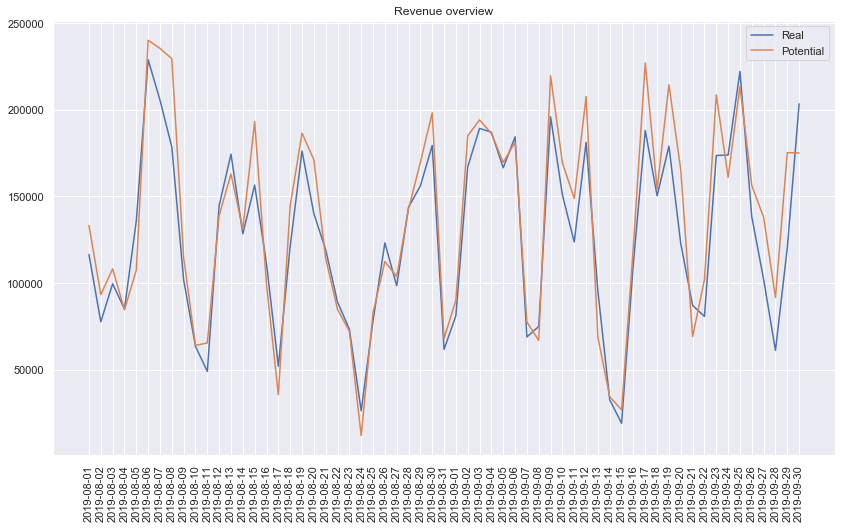

In [358]:
import seaborn as sns
sns.set()

plt.figure(figsize=(14,8))
plt.title("Revenue overview")
plt.plot(total_revenue['Дата'], total_revenue['Доход'], label="Real")
plt.plot(total_revenue['Дата'], total_revenue.Potential, label="Potential")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [290]:
def extract_ga_date(date):
    date = str(date)
    year, month, day = (date[:4], date[4:6], date[6:])
    
    return f"{year}-{month}-{day}"

age_gender0 = pd.read_csv("age_gender0.csv")
age_gender1 = pd.read_csv("age_gender1.csv")

age_gender0 = fix_columns(age_gender0)
age_gender1 = fix_columns(age_gender1)

age_gender0.date = age_gender0.date.apply(extract_ga_date)
age_gender0.date.head()

total_gender_revenue = age_gender0.groupby('date').transactionRevenue.sum()
total_gender_revenue.head()

date
2019-08-01    1.012800e+06
2019-08-02    6.856415e+05
2019-08-03    5.614107e+05
2019-08-04    4.702148e+05
2019-08-05    1.502756e+06
Name: transactionRevenue, dtype: float64

In [126]:
gender_stat = age_gender0.groupby(['date', 'userGender'], as_index=False).transactionRevenue.sum()
gender_stat['total'] = gender_stat.date.map(total_gender_revenue)
gender_stat['fraction'] = gender_stat.transactionRevenue / gender_stat.total
gender_stat['potential'] = gender_stat.transactionRevenue * ac
gender_stat.head()

,date,userGender,transactionRevenue,total,fraction,potential
0,2019-08-01,female,794986.242153,1.012800e+06,0.784939,799671.793156
1,2019-08-01,male,217814.126782,1.012800e+06,0.215061,246772.162220
2,2019-08-02,female,628358.584670,6.856415e+05,0.916454,725249.762095
3,2019-08-02,male,57282.917618,6.856415e+05,0.083546,62987.489609
4,2019-08-03,female,410204.894200,5.614107e+05,0.730668,464603.900988


In [330]:
date_set = list(gender_stat[gender_stat.userGender == 'male'].date[::3].values)


['2019-08-01',
 '2019-08-04',
 '2019-08-07',
 '2019-08-10',
 '2019-08-13',
 '2019-08-16',
 '2019-08-19',
 '2019-08-22',
 '2019-08-25',
 '2019-08-28',
 '2019-08-31',
 '2019-09-03',
 '2019-09-06',
 '2019-09-09',
 '2019-09-12',
 '2019-09-15',
 '2019-09-18',
 '2019-09-21',
 '2019-09-24',
 '2019-09-27',
 '2019-09-30']

In [334]:
list(gender_stat[(gender_stat.userGender == 'female') & (gender_stat.date.isin(date_set))] \
        .transactionRevenue.astype("int"))

[794986,
 386622,
 966529,
 307486,
 1442551,
 748156,
 947747,
 816709,
 362521,
 827059,
 318520,
 1166732,
 880541,
 1432435,
 1103034,
 873575,
 1015867,
 540505,
 936364,
 537758,
 886643]

In [335]:
list(gender_stat[(gender_stat.userGender == 'female') & (gender_stat.date.isin(date_set))] \
        .potential.astype("int"))

[799671,
 454217,
 1028752,
 307589,
 1556032,
 756508,
 1075420,
 832649,
 418365,
 843795,
 344376,
 1348857,
 941312,
 1579329,
 1287932,
 964506,
 1042045,
 620309,
 1028293,
 649451,
 990626]

In [363]:
device_stat = browser_df[(browser_df.dvc == 'desktop') | (browser_df.dvc == 'mobile')] \
    .groupby(['date', 'dvc'], as_index=False).transactionRevenue.sum()
device_stat['potential'] = device_stat.transactionRevenue * mu
device_stat.head()

,date,dvc,transactionRevenue,potential
0,2019-08-01,desktop,1.248975e+06,1.418251e+06
1,2019-08-01,mobile,3.085414e+04,3.341662e+04
2,2019-08-02,desktop,4.154936e+05,3.725345e+05
3,2019-08-02,mobile,3.577099e+05,3.650502e+05
4,2019-08-03,desktop,3.907692e+05,3.953294e+05


In [364]:
list(device_stat[(device_stat.dvc == 'mobile') & (device_stat.date.isin(date_set))].potential.astype("int"))

[33416,
 193064,
 55565,
 223924,
 177499,
 202341,
 71708,
 80358,
 33480,
 233200,
 64708,
 64046,
 332174,
 95579,
 90730,
 25792,
 145838,
 88005,
 78052,
 85803,
 124494]

In [125]:
age_stat = age_gender0.groupby(['date', 'userAgeBracket'], as_index=False).transactionRevenue.sum()
age_stat['total'] = age_stat.date.map(total_gender_revenue)
age_stat['fraction'] = age_stat.transactionRevenue / gender_stat.total
age_stat['potential'] = age_stat.transactionRevenue * ab
age_stat.head()

,date,userAgeBracket,transactionRevenue,total,fraction,potential
0,2019-08-01,18-24,57839.824489,1.012800e+06,0.057109,65247.199790
1,2019-08-01,25-34,433285.507072,1.012800e+06,0.427809,478657.828524
2,2019-08-01,35-44,218104.727516,1.012800e+06,0.318103,254099.334470
3,2019-08-01,45-54,159764.995012,1.012800e+06,0.233015,188883.761326
4,2019-08-01,55-64,33003.273037,1.012800e+06,0.058786,38067.725141


In [499]:
#ab = np.random.uniform(low=1, high=1.21, size=(age_stat.shape[0],))
#ac = np.random.uniform(low=1, high=1.21, size=(gender_stat.shape[0],))
#mu = np.random.normal(0.04, 0.15, device_stat.shape[0]) + 1


In [129]:
browser_df.shape[0]

20829

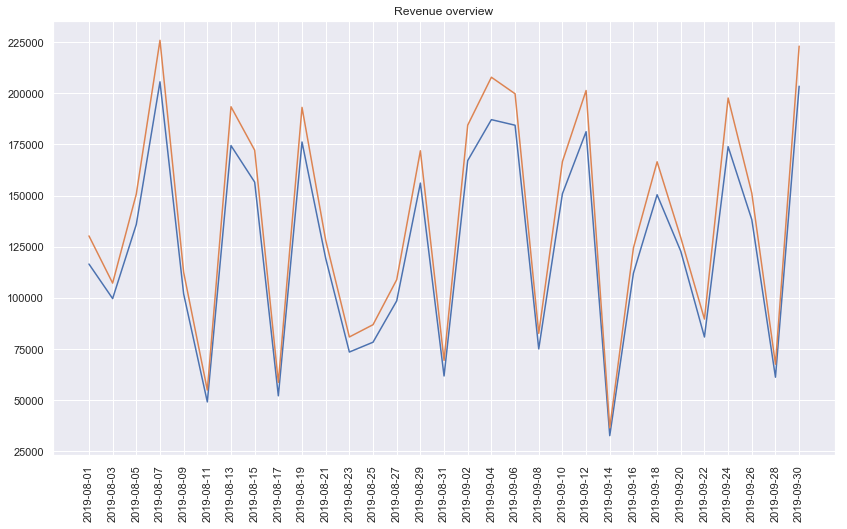

In [146]:
import seaborn as sns
sns.set()

plt.figure(figsize=(14,8))
plt.title("Revenue overview")
plt.plot(total_revenue['Дата'][::2], total_revenue['Доход'][::2])
plt.plot(total_revenue['Дата'][::2], total_revenue.Potential[::2])
plt.xticks(rotation=90)
plt.show()

In [237]:
top_features

['Директ Ср. Цена за Клик',
 'Ср. Время Сеанса',
 'PriceCover20',
 'clicks_average_position',
 'clicks_for_average_position',
 'shows_for_weighted_ctr',
 'P13_Bid',
 'P14_Price',
 'P14_Bid',
 'Транзакции']

In [238]:
bot_features

['P13_Price',
 'Директ ДРР',
 'Глубина просмотра',
 'Ср. позиция кликов',
 'Коэф. конверсии (транзакции)',
 'PriceCover50',
 'P23_Price',
 'P12_Price',
 'Директ Поиск Расход',
 'Директ Расход в гарантии и ротации']